In [8]:
!pwd

/mnt/pesaranlab/People/Gino/Coherence_modulator_analysis/Gino_codes/other_codes


In [9]:
load_path = '/mnt/pesaranlab/People/Gino/Coherence_modulator_analysis/Shaoyu_data/both_monkeys/high_low_theta/'

In [10]:
import scipy.io
import pandas as pd
import seaborn as sns
import numpy as np
# load data with coherence phase in range [4-9] Hz
angle_low = scipy.io.loadmat(load_path+'angle_low.mat')
angle_high = scipy.io.loadmat(load_path+'angle_high.mat')

# load data with coherence phase equal to 7 Hz only
angle_low_7 = scipy.io.loadmat(load_path+'angle_low_7Hz.mat')
angle_high_7 = scipy.io.loadmat(load_path+ 'angle_high_7Hz.mat')

In [11]:
# create array
low = angle_low['angle_low']
high = angle_high['angle_high']
low_7 = angle_low_7['angle_low']
high_7 = angle_high_7['angle_high']

In [12]:
# concatenate array for data structure
angle = np.concatenate((low.T,high.T),axis = 1)
angle_7 = np.concatenate((low_7.T,high_7.T),axis = 1)

In [14]:
# data structure for theta [4,9] Hz
df = pd.DataFrame(angle, columns = ['low','high'])
df

,low,high
0,0.408738,0.189802
1,0.345395,0.149003
2,0.423573,0.151511
3,0.347697,0.147830
4,0.511363,0.227327
...,...,...
1865,0.581541,0.244303
1866,0.811953,0.410824
1867,0.770554,0.452211
1868,0.472182,0.467432


In [32]:
(np.pi/2)%(2*np.pi)

1.5707963267948966

### [0,2$\pi$] reference frame

In [41]:
# [0,2pi] reference frame instead than [-pi,pi]
df_2pi = df.copy()
df_2pi['low'] = (df['low'].values) % (2*np.pi)
df_2pi['high'] = (df['high'].values) % (2*np.pi)

In [145]:
# data structure for theta 7 Hz
df_7 = pd.DataFrame(angle_7, columns = ['low','high'])
df_7

,low,high
0,0.364358,0.484119
1,-1.876405,0.287890
2,-0.138652,0.415597
3,0.692075,0.605023
4,-0.004689,0.487264
...,...,...
165,0.631266,-2.005032
166,1.566692,-1.967983
167,2.792533,-1.653222
168,-0.345355,0.441633


### Coherence phase plot for $\theta$ in [4,9] Hz

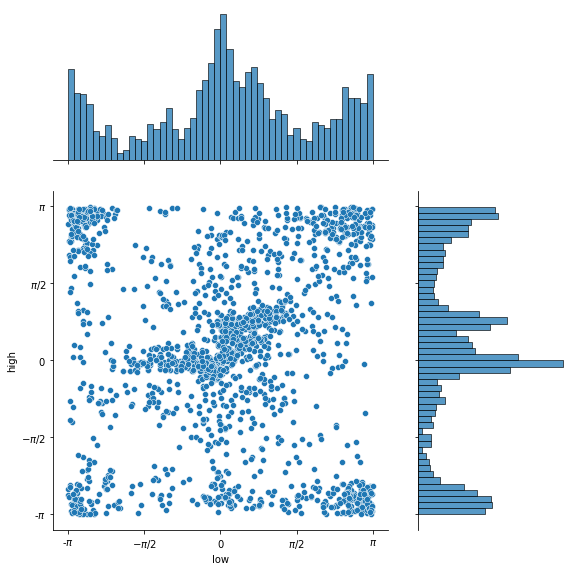

In [54]:
plt = sns.jointplot(data=df, x="low", y="high",height =8,ratio=2,marginal_kws=dict(bins=50))
plt.ax_joint.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])  # Set label locations.
plt.ax_joint.set_xticklabels(['-$\pi$', '$-\pi/2$', '$0$','$\pi/2$','$\pi$']);  # Set text labels.
plt.ax_joint.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])  # Set label locations.
plt.ax_joint.set_yticklabels(['-$\pi$', '$-\pi/2$', '$0$','$\pi/2$','$\pi$']); # Set text labels.

plt.figure.savefig(load_path+"Phase_coh_theta_range.png")

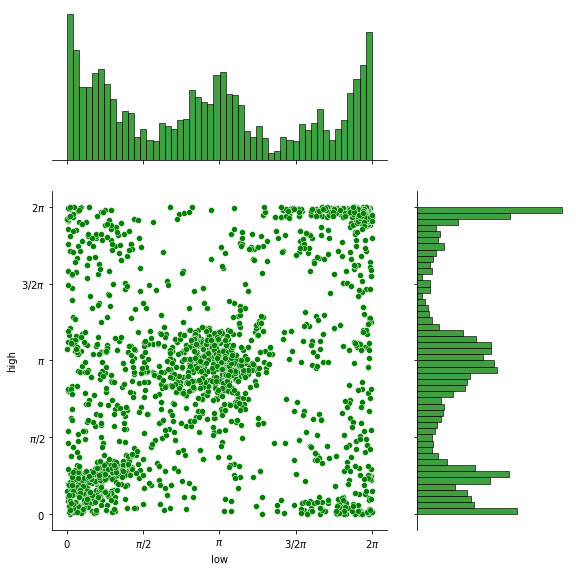

In [55]:
plt = sns.jointplot(data=df_2pi, x="low", y="high",height =8,color = 'g',ratio=2,marginal_kws=dict(bins=50))
plt.ax_joint.set_xticks([0,np.pi/2,np.pi,3/2*np.pi,2*np.pi])  # Set label locations.
plt.ax_joint.set_xticklabels(['$0$', '$\pi/2$', '$\pi$','$3/2\pi$','$2\pi$']);  # Set text labels.
plt.ax_joint.set_yticks([0,np.pi/2,np.pi,3/2*np.pi,2*np.pi])  # Set label locations.
plt.ax_joint.set_yticklabels(['$0$', '$\pi/2$', '$\pi$','$3/2\pi$','$2\pi$']);  # Set text labels.

plt.figure.savefig(load_path+"Phase_coh_theta_range_2pi.png")

In [56]:
# shuffle low theta frequency to create another joint distribution with the same marginals
df_shuffle = df.copy()
df_shuffle['low'] = np.random.permutation(df['low'].values)
df_shuffle_2pi = df_2pi.copy()
df_shuffle_2pi['low'] = np.random.permutation(df_2pi['low'].values)

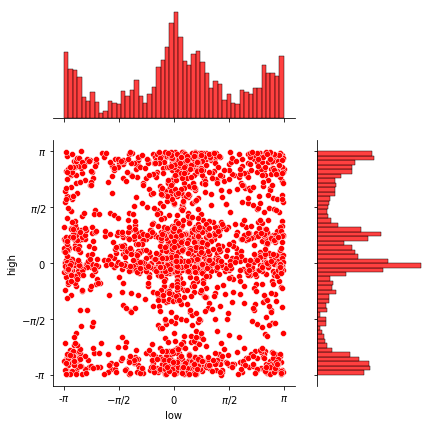

In [57]:
plt = sns.jointplot(data=df_shuffle, x="low", y="high",height =6,ratio=2,color ='r', marginal_kws=dict(bins=50))
plt.ax_joint.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])  # Set label locations.
plt.ax_joint.set_xticklabels(['-$\pi$', '$-\pi/2$', '$0$','$\pi/2$','$\pi$']);  # Set text labels.
plt.ax_joint.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])  # Set label locations.
plt.ax_joint.set_yticklabels(['-$\pi$', '$-\pi/2$', '$0$','$\pi/2$','$\pi$']); # Set text labels.

plt.figure.savefig(load_path+"Phase_coh_theta_range_shuffled.png")

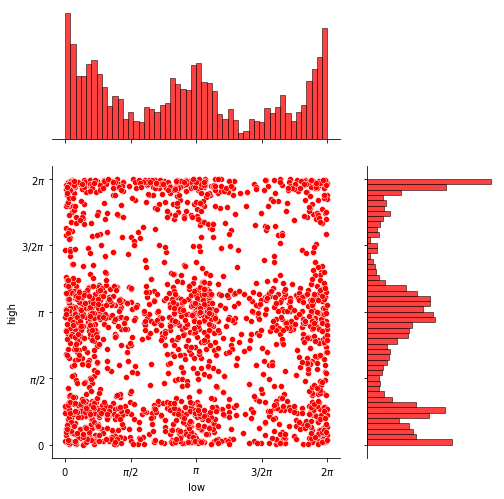

In [60]:
plt = sns.jointplot(data=df_shuffle_2pi, x="low", y="high",height =7,ratio=2,color ='r', marginal_kws=dict(bins=50))
plt.ax_joint.set_xticks([0,np.pi/2,np.pi,3/2*np.pi,2*np.pi])  # Set label locations.
plt.ax_joint.set_xticklabels(['$0$', '$\pi/2$', '$\pi$','$3/2\pi$','$2\pi$']);  # Set text labels.
plt.ax_joint.set_yticks([0,np.pi/2,np.pi,3/2*np.pi,2*np.pi])  # Set label locations.
plt.ax_joint.set_yticklabels(['$0$', '$\pi/2$', '$\pi$','$3/2\pi$','$2\pi$']);  # Set text labels.

plt.figure.savefig(load_path+"Phase_coh_theta_range_shuffled_2pi.png")

### Coherence phase plot for $\theta$ in [4,9] Hz

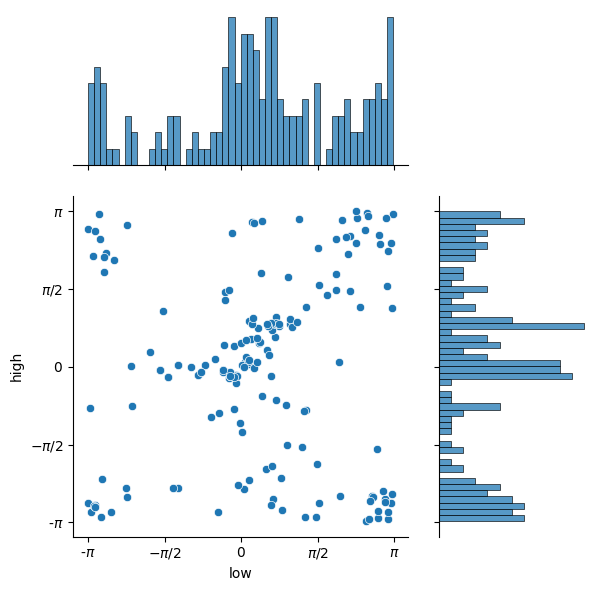

In [158]:
plt = sns.jointplot(data=df_7, x="low", y="high",height =6,ratio=2,marginal_kws=dict(bins=50))
plt.ax_joint.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])  # Set label locations.
plt.ax_joint.set_xticklabels(['-$\pi$', '$-\pi/2$', '$0$','$\pi/2$','$\pi$']);  # Set text labels.
plt.ax_joint.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])  # Set label locations.
plt.ax_joint.set_yticklabels(['-$\pi$', '$-\pi/2$', '$0$','$\pi/2$','$\pi$']); # Set text labels.

plt.figure.savefig(load_path+"Phase_coh_theta_7Hz.png")

In [153]:
# shuffle low theta frequency to create another joint distribution with the same marginals
df_shuffle_7 = df_7.copy()
df_shuffle_7['low'] = np.random.permutation(df_7['low'].values)

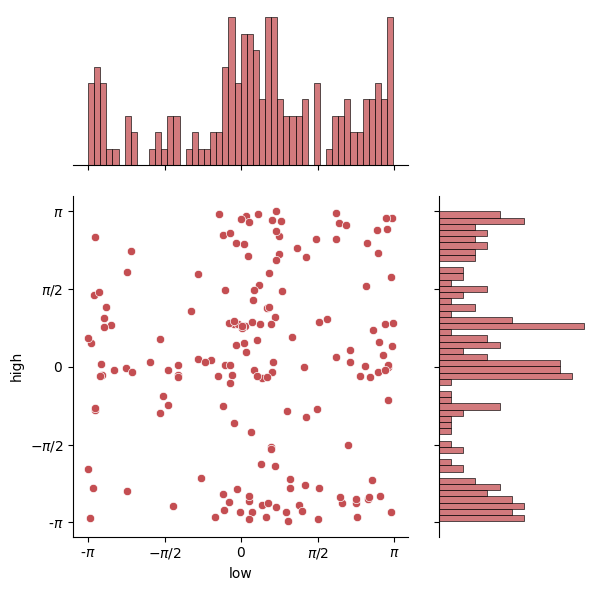

In [159]:
plt = sns.jointplot(data=df_shuffle_7, x="low", y="high",height =6,ratio=2,color = 'r',marginal_kws=dict(bins=50))
plt.ax_joint.set_xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])  # Set label locations.
plt.ax_joint.set_xticklabels(['-$\pi$', '$-\pi/2$', '$0$','$\pi/2$','$\pi$']);  # Set text labels.
plt.ax_joint.set_yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi])  # Set label locations.
plt.ax_joint.set_yticklabels(['-$\pi$', '$-\pi/2$', '$0$','$\pi/2$','$\pi$']); # Set text labels.

plt.figure.savefig(load_path+"Phase_coh_theta_7Hz_shuffled.png")